In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset
columns = ['age', 'sex', 'cp', 'testbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df = pd.read_csv('processed.cleveland.data', header=None, names=columns)

# View dataframe (first 5, last 5)
df

,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   testbps  303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  num      303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [23]:
# Clean up the data by throwing out entries with missing 'ca' or 'thal' data
df = df[df['ca'] != '?']
df = df[df['thal'] != '?']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    float64
 1   sex      297 non-null    float64
 2   cp       297 non-null    float64
 3   testbps  297 non-null    float64
 4   chol     297 non-null    float64
 5   fbs      297 non-null    float64
 6   restecg  297 non-null    float64
 7   thalach  297 non-null    float64
 8   exang    297 non-null    float64
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    float64
 11  ca       297 non-null    object 
 12  thal     297 non-null    object 
 13  num      297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


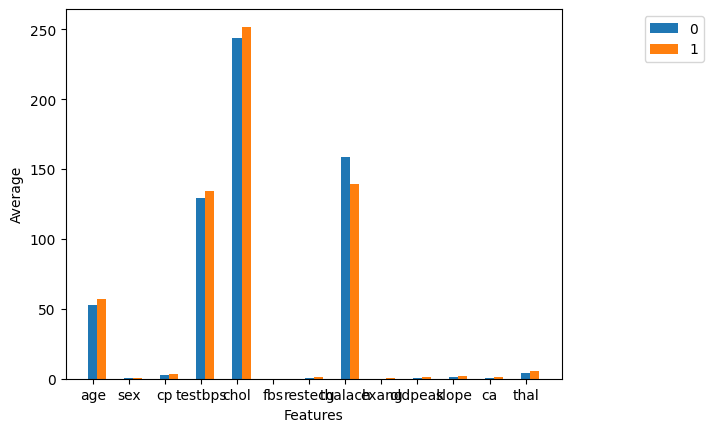

In [26]:
# Plot the average of each feature of each class
df['num'] = df['num'].replace(2, 1)
df['num'] = df['num'].replace(3, 1)
df['num'] = df['num'].replace(4, 1)
# # Define features x and target y
feat = 13
x = df.iloc[:, :feat]
y = df.iloc[:, -1]
dfdata = df.values
x_data = dfdata[:,:feat]
y_data = dfdata[:,-1]
x_axis = np.arange(feat)
y_values = np.array([np.average(x_data[:, i][y==j].astype('float32')) for i in range(x_data.shape[1]) for j in (np.unique(y))])
y_reshaped = y_values.reshape(feat,2)
y_reshaped = np.swapaxes(y_reshaped, 0, 1)
width = 0.25

plt.bar(x_axis, y_reshaped[0], width, label="0")
plt.bar(x_axis+width, y_reshaped[1], width, label="1")
# plt.bar(x_axis+width*2, y_reshaped[2], width, label="2")
# plt.bar(x_axis+width*3, y_reshaped[3], width, label="3")
# plt.bar(x_axis+width*4, y_reshaped[4], width, label="4")
plt.xticks(x_axis, columns[:feat])
plt.xlabel("Features")
plt.ylabel("Average")
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()

In [27]:
# Split data into train and test datasets
# Test size = 20%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0, shuffle=True)

# Create logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

# View confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))

# View accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of model is {:.2f}".format(accuracy))

[[27  3]
 [ 8 22]]
Accuracy of model is 81.67


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
